In [39]:
import pandas as pd
import numpy as np
import scipy.stats
from IPython.core.display import display
from matplotlib import pyplot as plt
import seaborn as sns

path = 'barnstable_data.xlsx'
df = pd.read_excel(path,index_col='date')
df['tilde_r'] = df['S&P 500'] - df['T-bills']
display(df)

,S&P 500,T-bills,tilde_r
date,,,
1926-01-30,-0.001783,0.003061,-0.004844
1926-02-27,-0.033296,0.002612,-0.035908
1926-03-31,-0.057708,0.002601,-0.060309
1926-04-30,0.038522,0.002270,0.036252
1926-05-28,0.013623,0.002691,0.010932
...,...,...,...
2020-06-30,0.020348,0.000097,0.020251
2020-07-31,0.056910,0.000076,0.056834
2020-08-31,0.072068,0.000076,0.071992


In [40]:
# The case assumes that the stock returns are iid, and is log-normally distributed
# To calculate the level returns and the log returns

level_mu = 0.13
log_sigma = 0.16
log_mu = np.log(level_mu+1)-(1/2) * log_sigma**2
print('log mu: {:.3f}'.format(log_mu))

level_sigma = np.sqrt(np.exp(2*log_mu+log_sigma**2)*(np.exp(log_sigma**2)-1))
print('level sigma: {:.3f}'.format(level_sigma))
print('level variance: {:.3f}'.format(level_sigma**2))

log mu: 0.109
level sigma: 0.182
level variance: 0.033


In [41]:
# To estimate the under-performance
# The above estimate was directly from the case, no we're using the real data to do the test ourselves

def subtable_2_1(r_M='S&P 500', r_f='T-bills', df=df): # market & risk-free
    table = pd.DataFrame(columns=['mean', 'std'],
        index=['r_M', 'tilde_r_M', 'r_f'])

    table.loc['r_M', 'mean'] = df[r_M].mean() * 12
    table.loc['r_f', 'mean'] = df[r_f].mean() * 12
    table.loc['tilde_r_M', 'mean'] = table.loc['r_M', 'mean'] - table.loc['r_f', 'mean']

    # the method to calculate the annualized standard deviation: df[column].std()*np.sqrt(12)
    table.loc['r_M', 'std'] = df[r_M].std() * np.sqrt(12)
    table.loc['r_f', 'std'] = df[r_f].std() * np.sqrt(12)
    table.loc['tilde_r_M', 'std'] = (df[r_M] - df[r_f]).std() * np.sqrt(12)
    return table

# Then to calculate the level and log statistics
# Levels
df_subset = df.loc['1965':'1999']
subtable_level_1965_1999 = subtable_2_1(df=df_subset) # you just change the df parameter

df_subset = df.loc['2000':'2020']
subtable_level_2000_2020 = subtable_2_1(df=df_subset)

df_subset = df.loc['1965':'2020']
subtable_level_1965_2020 = subtable_2_1(df=df_subset)


# Log tables
# from level returns to log returns, why you're adding 1 here?
df_subset = np.log(df.loc['1965':'1999'] + 1)
subtable_log_1965_1999 = subtable_2_1(df=df_subset)

df_subset = np.log(df.loc['2000':'2020'] + 1)
subtable_log_2000_2020 = subtable_2_1(df=df_subset)

df_subset = np.log(df.loc['1965':'2020'] + 1)
subtable_log_1965_2020 = subtable_2_1(df=df_subset)


# Now you display two tables
# because you used 'subtable-2-1' to calculate those statistics, the column names
# are all 'mean', so here you need to rename the columns of dataframes to put on the
# time stamps
subtable_level_1965_1999 = subtable_level_1965_1999.rename(columns=\
                    {'mean':'mean 1965-1999','std':'std 1965-1999'})

subtable_level_2000_2020 = subtable_level_2000_2020.rename(columns=\
                    {'mean':'mean 2000-2020','std':'std 2000-2020'})

subtable_level_1965_2020 = subtable_level_1965_2020.rename(columns=\
                    {'mean':'mean 1965-2020','std':'std 1965-2020'})

q21 = pd.concat([subtable_level_1965_1999,subtable_level_2000_2020,subtable_level_1965_2020], axis=1)
print('Solution Table 2: Case Parameters for LEVELS')
display(q21)


subtable_log_1965_1999 = subtable_log_1965_1999.rename(columns=\
                    {'mean':'mean 1965-1999','std':'std 1965-1999'})
subtable_log_2000_2020 = subtable_log_2000_2020.rename(columns=\
                    {'mean':'mean 2000-2020','std':'std 2000-2020'})
subtable_log_1965_2020 = subtable_log_1965_2020.rename(columns=\
                    {'mean':'mean 1965-2020','std':'std 1965-2020'})
q22 = pd.concat([subtable_log_1965_1999,subtable_log_2000_2020,subtable_log_1965_2020], axis=1)
print('Solution Table 3: Case Parameters for LOGS')
display(q22)

Solution Table 2: Case Parameters for LEVELS
Solution Table 3: Case Parameters for LOGS


,mean 1965-1999,std 1965-1999,mean 2000-2020,std 2000-2020,mean 1965-2020,std 1965-2020
r_M,0.129354,0.149404,0.070562,0.150128,0.107417,0.149788
tilde_r_M,0.0678511,0.150226,0.0552853,0.150666,0.0631881,0.150289
r_f,0.0615028,0.00717899,0.0152766,0.00506818,0.0442285,0.00914133


,mean 1965-1999,std 1965-1999,mean 2000-2020,std 2000-2020,mean 1965-2020,std 1965-2020
r_M,0.1176,0.149568,0.0590501,0.15144,0.0957529,0.150379
tilde_r_M,0.0562795,0.150396,0.043796,0.151958,0.0516471,0.15088
r_f,0.0613204,0.00713204,0.0152542,0.0050577,0.0441058,0.0091003


#### Comments:
* The sub-sample 1965-1999 has much higher returns compared with the full sample and sub-sample 2000-2020
* This is largely due to lower market returns in the later period.
* The log returns shows lower values as expected.

#### To calculate the possibilities of the cumulative market return
#### to fall short of the cumulative risk-free return

### To Clarify This:
in order to calculate $$Pr [R^M_{t,t+h} < R^f_{t,t+h}]$$
the cumulative log returns are simply the sum of single returns
We apply the cumulative function to both side $$ Pr [\sum_{i=1}^h R^M_{t,t+h} < \sum_{i=1}^h R^f_{t,t+h}]$$
it will be easier to use average returns, by divided by $$\frac{1}{h}$$

that is $$Pr[\bar r^M_{t,t+h} - \bar r^f_{t,t+h} < 0]$$ to calculate the average excessive return below 0

Which is just $$Pr[\tilde r^M_{t,t+h}<0]$$, and $$\tilde r^M_{t,t+h}$$ denotes the h-period sample average of $$\tilde r^M$$

Meanwhile, given that **we assume the stock returns is iid and the log returns follows the normal distribution, that is:
$$\tilde r^M_{t,t+h} \sim N(\tilde \mu, \frac{\sigma^2}{h})$$
that $$\tilde\mu \equiv E[\tilde r^M] = \mu - \mu_f $$
and $$\tilde \sigma \equiv std[\tilde r^M]$$
thus $$ p(h) = Ф _N \left( - \sqrt{h} \frac{\tilde{\mu}} {\tilde{\sigma} }\right) $$

Now with the historical data, we can do the estimated possibilities that the market returns perform worse than risk-free returns
over the next 30 years

In [42]:
df_subset = df.loc['1965':'1999',:]
table_4 = pd.DataFrame(columns=['h','Possibilities'])
table_4['h'] = [x for x in range(5,35,5)]
table_4.set_index('h',inplace=True)

def possibilities(h, tilde_mu, tilde_sigma):
    x = -np.sqrt(h) * tilde_mu / tilde_sigma # here's the value on the x-axis of the cdf
    value = scipy.stats.norm.cdf(x) # use cdf to calculate the cumulative possibilities
    return value


# now to calculate the possibilities of 1965 - 1999, remember to use log returns
tilde_mu = subtable_log_1965_1999.loc['tilde_r_M','mean 1965-1999']
tilde_sigma = subtable_log_1965_1999.loc['tilde_r_M','std 1965-1999']

table_4['Possibilities'] = possibilities(table_4.index,tilde_mu,tilde_sigma)
display(table_4.T)
print('5-year possibility: {:.4f}'.format(table_4.loc[5,'Possibilities'])) # Note here that the index could be directly referred as numbers, no need to put as "5"
print('20-year possibilities: {:.4f}'.format(table_4.loc[20,'Possibilities']))

h,5,10,15,20,25,30
Possibilities,0.201366,0.118336,0.073627,0.047114,0.03067,0.020201


5-year possibility: 0.2014
20-year possibilities: 0.0471


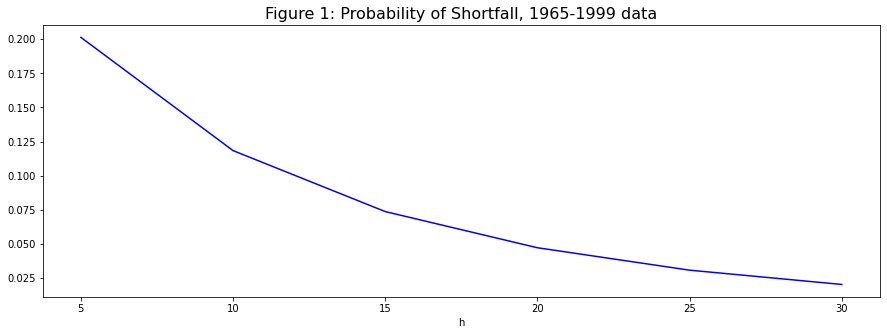

In [43]:
# Plot the probability as a function of the investment horizon, h, for 0 < h <= 30 years.
fig, ax = plt.subplots(figsize=(15,5))
table_4['Possibilities'].plot(color='blue');
plt.title('Figure 1: Probability of Shortfall, 1965-1999 data', fontsize=16);


In [44]:
# Now we extend our historical data sample from 1965 to 2020
df_subset = df.loc['1965':'2020',:]
table_5 = pd.DataFrame(columns=['h','Possibilities'])
table_5['h'] = [x for x in range(5,35,5)]
table_5.set_index('h',inplace=True)

tilde_mu = subtable_log_1965_2020.loc['tilde_r_M', 'mean 1965-2020']
tilde_sigma = subtable_log_1965_2020.loc['tilde_r_M', 'std 1965-2020']

table_5['Possibilities'] = possibilities(table_5.index,tilde_mu,tilde_sigma)
display(table_5.T)
print('30-year possibilities: {:.4f}'.format(table_5.loc[30,'Possibilities']))

h,5,10,15,20,25,30
Possibilities,0.22201,0.139522,0.092461,0.062904,0.043491,0.030404


30-year possibilities: 0.0304


In [45]:
# in the previous analysis, we're using the same period tilde_r_M when calculating the tilde mu
# Now we are using returns of different time periods
# using the old mu and sigma from 1965-1999, what will be the possibility that the 21-year market return will be
# smaller than the return of 2000-2020?
def prob_calc(mu, bar_r, sigma, years):
    x = - np.sqrt(years) * (mu - bar_r)/sigma
    val = scipy.stats.norm.cdf(x)
    return val

# still using the mu and sigma from 1965-1999
table6 = pd.DataFrame(columns=['mu', 'prob'])
table6.loc['1999 prob underperforming 2000-2020', 'mu'] =\
    subtable_log_1965_1999.loc['r_M', 'mean 1965-1999']
sigma = subtable_log_1965_1999.loc['r_M', 'std 1965-1999']

table6.loc['1999 prob underperforming 2000-2020', 'prob'] = \
    prob_calc(
        subtable_log_1965_1999.loc['r_M', 'mean 1965-1999'],
        subtable_log_2000_2020.loc['r_M', 'mean 2000-2020'],
        sigma,21)
display(table6)

,mu,prob
1999 prob underperforming 2000-2020,0.1176,0.0364151


Suppose Barnstable had implemented the put-option strategy with the growing strike of
6%?
Based on the 2000-2020 performance, what is the probability that the 2000-2029
cumulative market return will be low enough to make the puts in the money?




In [46]:
# the growing strike is 0.06, thus for 30 years, the log of growth would be 30*0.06=1.8
# TODO: Confusing here
x = -np.sqrt(12) * (
    (subtable_log_1965_1999.loc['r_M', 'mean 1965-1999'] - 0.06) +
    21/12 * (subtable_log_2000_2020.loc['r_M', 'mean 2000-2020'] - 0.06)
    ) / sigma
p = scipy.stats.norm.cdf(x)
print('Prob = {:.4f}'.format(p))

Prob = 0.0976


In [47]:
# above we're comparing the market return against the risk free returns
# now we're comparing the excessive returns in different periods

table7 = pd.DataFrame(columns=['mu', 'prob'])
table7.loc['1999 prob underperforming 2000-2020', 'mu'] = \
    subtable_log_1965_1999.loc['tilde_r_M', 'mean 1965-1999']

# still using the sigma from 1965 to 1999
sigma = subtable_log_1965_1999.loc['tilde_r_M', 'std 1965-1999']
table7.loc['1999 prob underperforming 2000-2020', 'prob'] = \
    prob_calc(
        subtable_log_1965_1999.loc['tilde_r_M', 'mean 1965-1999'],
        subtable_log_2000_2020.loc['tilde_r_M', 'mean 2000-2020'],
        sigma,21)
# the possibility that the return of 1965 to 1999 will be lower than the actual returns in the future 21 years
display(table7.T)

,1999 prob underperforming 2000-2020
mu,0.0562795
prob,0.351835


## Modeling Volatility and VaR

In [48]:
df.head()

,S&P 500,T-bills,tilde_r
date,,,
1926-01-30,-0.001783,0.003061,-0.004844
1926-02-27,-0.033296,0.002612,-0.035908
1926-03-31,-0.057708,0.002601,-0.060309
1926-04-30,0.038522,0.002270,0.036252
1926-05-28,0.013623,0.002691,0.010932


Text(0.5, 1.0, 'Historical VaR')

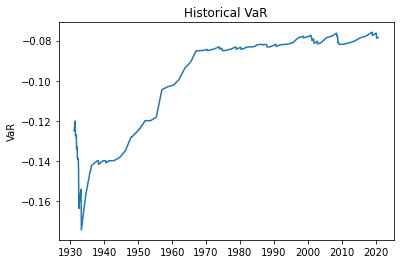

In [51]:
# Starting at t = 61, calculate the historic-based VaR.
# based on the expanding sample from period 1 (Jan 1926) to t - 1.
# By historic VaR, we mean simply taking the 5th quantile for the historic
# sample up to time t - 1.

var_hist = df['tilde_r'].shift(1).expanding(60).quantile(0.05).dropna()
# here, we're expanding our window of size 60 from top to down
# and take the 5% quantile, and continue to do so till the year t-1
plt.plot(var_hist)
plt.ylabel('VaR')
plt.title("Historical VaR")
# this histogram is the 5% VaR over the whole time-frame

In [58]:
# to calculate the frequency r_tilde will fall below this VaR
# remember in the above we started from t = 61, so the hist graph will have fewer data points than df
freq = np.size(var_hist[df.iloc[60:]['tilde_r']<var_hist])
print("Frequency of r_tilde < r_tilde_var: %d" %freq)
np.round(freq*100/np.size(var_hist.index),2)

date
1931-05-29   -0.120066
1931-09-30   -0.126873
1931-12-31   -0.133082
1932-04-30   -0.138662
1932-05-31   -0.144204
1933-02-28   -0.154177
1938-03-31   -0.139862
1940-05-31   -0.139831
1970-04-30   -0.084395
1973-11-30   -0.083047
1974-08-30   -0.083729
1974-09-30   -0.084618
1978-10-31   -0.083127
1980-03-31   -0.083308
1986-09-30   -0.081866
1987-10-30   -0.081904
1987-11-30   -0.082585
1990-08-31   -0.081938
1998-08-31   -0.077837
2000-11-30   -0.077279
2001-02-28   -0.078239
2001-09-28   -0.079208
2002-09-30   -0.080246
2008-06-30   -0.076228
2008-09-30   -0.077797
2008-10-31   -0.078560
2009-01-30   -0.080765
2009-02-27   -0.081701
2018-12-31   -0.075819
2020-02-28   -0.076228
2020-03-31   -0.077877
Name: tilde_r, dtype: float64
Frequency of r_tilde < r_tilde_var: 31


2.88

#### The drawback of this hist VaR

1. By definition of VaR, **number instances of return should be less than VaR (5%) should be close to 5%**, but in our case it is less than 3%,it's only 2.88%.
2. This method of calculation **is valid if there is smooth tail**, and does not give correct result if tails are not smooth.


## Volatility
### Expanding Series; IGARCH; Rolling Window


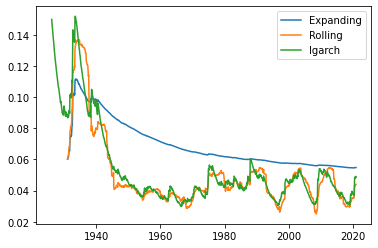

In [59]:
import itertools
#part a
def rms(x):
    return (lambda x: ((x**2).sum()/len(x))**(0.5))

#Expanding Series and Rolling Window
sigma_expanding = df['tilde_r'].shift(1).dropna().expanding(60).apply(lambda x: ((x**2).sum()/len(x))**(0.5))
sigma_roll = df['tilde_r'].shift(1).dropna().rolling(60).apply(lambda x: ((x**2).sum()/len(x))**(0.5))

#IGARCH
ig = df['tilde_r'].shift(1).dropna()
ig.iloc[0] = 0.15
sigma_ig = pd.Series(itertools.accumulate(ig, lambda a, b: (0.97 * a**2 + (1-0.97) * b**2)**0.5), index=sigma_expanding.index)

#Plot those volatilities
plt.plot(sigma_expanding,label='Expanding')
plt.plot(sigma_roll,label='Rolling')
plt.plot(sigma_ig,label='Igarch')
plt.legend()

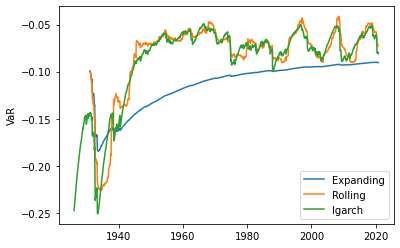

In [60]:
# Now to use those volatilities to draw the VaR
# we simply put VaR here as -1.65*sigma

#part b
var_expanding = -1.65*sigma_expanding
var_roll = -1.65*sigma_roll
var_igarch = -1.65*sigma_ig

plt.plot(var_expanding,label='Expanding')
plt.plot(var_roll,label='Rolling')
plt.plot(var_igarch,label='Igarch')
plt.ylabel('VaR')
plt.legend()

In [62]:
#part c
freq = np.size(var_expanding[df.loc[var_expanding.index]['tilde_r']<var_expanding])
print("Frequency of tilde_r < var_expanding: %d" %freq)
freq = np.size(var_roll[df.loc[var_roll.index]['tilde_r']<var_roll])
print("Frequency of tilde_r < var_rolling: %d" %freq)
freq = np.size(var_igarch[df.loc[var_igarch.index]['tilde_r']<var_igarch])
print("Frequency of tilde_r < var_igarch: %d" %freq)

Frequency of tilde_r < var_expanding: 19
Frequency of tilde_r < var_rolling: 51
Frequency of tilde_r < var_igarch: 46


#### part d
Rolling and igarch is better method for calculating VaR as it is able to provide VaR close to 5% whereas expanding window and historical method estimate is way lower than 5% (looking at frequency) Additionally, rolling and igarch adjust to current volatility better than expanding and historical leading to volatility clustering which exist in real world.

